# Laboratório #5

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá analisar os efeitos que magnitudes diferentes dos atributos causam no treinamento do gradiente descendente e como isso pode ser mitigado com o escalonamento dos atributos.

Dada a seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 10000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 1 e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),  $$

onde $x_1$ é um vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância unitária e $x_2$ é outro vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância igual a 100.

A **função hipótese** para este exercício deve ser

$$h(n) = a_1 x_1(n) + a_2 x_2(n).$$

**DICAS**:

+ A biblioteca `numpy` fornece uma função chamada `rand` para geração de valores aleatórios retirados de uma distribuição uniforme. Seu uso é idêntico ao da função `randn`, a qual gera valores retirados de uma distribuição Gaussiana Normal Padrão (ou seja, com média zero e variância unitára). O código abaixo gera um vetor coluna com 100 linhas e 1 coluna com valores retirados de uma distribuição uniforme no intervalo de $0$ a $100$.
```python
import numpy as np
x = 100*np.random.rand(100,1)
```
+ O mesmo pode ser feito para gerar vetores com a função `randn`, para isso, apenas troque `rand` por `randn` no exemplo acima.
+ Para gerar um vetor com valores retirados de uma variável aleatória Gaussiana com variância igual a `var`, multiplique o vetor pela raíz quadrada da variância, por exemplo
```python
x = np.sqrt(var)*np.random.randn(N,1)
```
+ Para resolver as questões deste exercício, se baseie no código do seguinte exemplo: [escalonamento_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/escalonamento_de_atributos_com_scikit_learn.ipynb).
+ Para informações mais detalhadas à respeito do escalonamento de atributos, acesse o seguinte documento: [Escalonamento de Atributos](https://github.com/zz4fap/t319_aprendizado_de_maquina/blob/main/slides/T319_Regressão_Linear%20(Escalonamento%20de%20Atributos).pdf)
+ Não se esqueça de importar as bibliotecas necessárias. Veja o notebook de exemplo e importe as mesmas bibliotecas utilizadas por ele (copie exatamente como está no exemplo).
+ Todas as funções que estamos utilizando neste laboratório estão definidas no arquivo `lab5_functions.py`, o que se encontra na mesma pasta que este notebook.

De posse destas informações, faça o seguinte:

1. Gere o conjunto de treinamento e plote uma figura com os histogramas dos atributos $x_1$ e $x_2$.

**DICA**
+ Logo após ter importado as bibliotecas, use a função `np.random.seed` com a semente igual a 42 para resetar o gerador de sequências pseudo-aleatórias.
```python
np.random.seed(42)
```

In [1]:
# Digite aqui o código do exercício.

2. Com base nos histogramas de $x_1$ e $x_2$ mostrados na figura acima, qual dos atributos tem um intervalo de variação maior?

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

3. O trecho de código abaixo utiliza o algoritmo do gradiente descendente para encontrar uma solução para o problema da regressão linear dado no enunciado deste exercício. Execute o trecho de código abaixo e analise o resultado obtido.

**DICA**
+ A execução da célula de código abaixo pode levar um certo tempo.

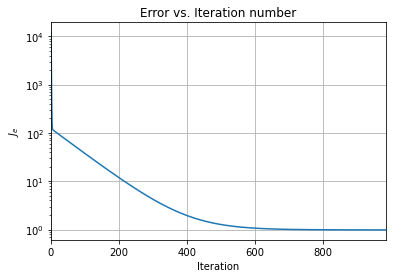

In [2]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# learning rate.
alpha = 0.003

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(X, y_noisy, alpha, n_iterations)

lab5.plotErroVersusIteration(Jgd, iteration)

Após analisar o resultado, responda:

A. O algoritmo converge após quantas iterações?

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

4. Execute a célula de código abaixo e analise os resultados. Observe que são mostrados os gráficos:
+ da superfície de erro, 
+ do contorno da superfície de erro com o histórico de atualizações dos pesos, além do ponto ótimo, o qual foi encontrado com a equação normal.
+ da variação do gradiente com relação aos pesos $a_1$ e $a_2$ ao longo das iterações.

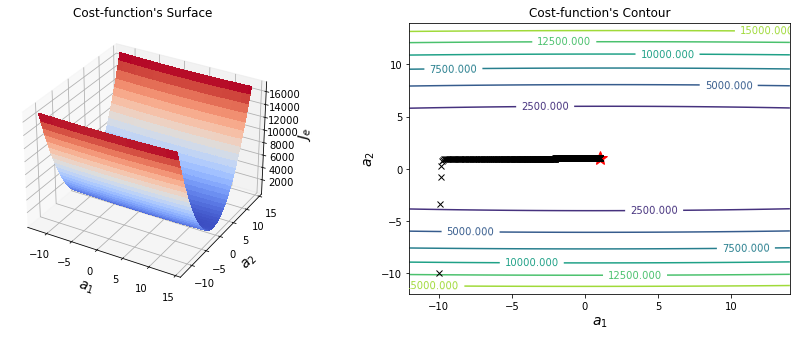

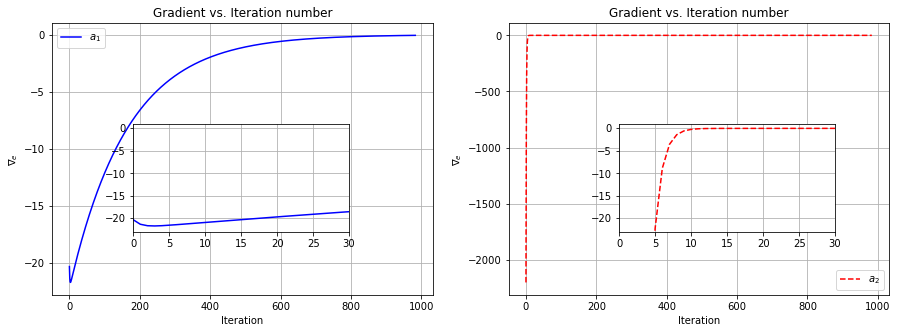

In [3]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(X, y_noisy)

# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt, a_hist, iteration)

# Plot gradient history.
lab5.plotGradientHistory(grad_hist, iteration, x_max=30)

Após analisar os resultados, responda:

**Justifique todas as respostas.**

A. Qual o formato da superfície de erro? Por que ela tem este formato?<br/><br/>
B. Em qual sentido (ou seja, eixo) o erro varia mais rapidamente?<br/><br/>
C. Dado que o algoritmo do gradiente descendente é iniciado com os pesos $a_1=-10$ e $a_2=-10$, qual é o comportamento do histórico de atualização dos pesos nas 4 primeiras iterações e depois delas? (**Dica**: Analise a figura do contorno da superfície de erro com o histórico de atualizações dos pesos, veja como os pesos se movem nas 4 primeiras iterações e após.)<br/><br/>
D. Qual dos pesos tem seu valor ótimo encontrando antes?

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**

5. Faça a **padronização** dos atributos $x_1$ e $x_2$, em seguida, plote o histograma dos atributos padronizados e analise os resultados.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [escalonamento_de_atributos_com_scikit_learn.ipynb].
+ Para que os próximos itens funcionem corretamente, chame a variável que irá armazenar os atributos padronizados de `scaled_X`, assim como está no código do notebook de exemplo acima.

In [2]:
# Escreva o código aqui.

Após analisar os resultados, responda:

A. Qual a diferença entre o histograma acima e o obtido no item 1 deste exercício?<br/>

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

6. O trecho de código abaixo utiliza o algoritmo do gradiente descendente para encontrar uma solução para o problema da regressão linear dado no enunciado deste exercício utilizando a padronização dos atributos. Execute o trecho de código abaixo e analise o resultado obtido.

**DICA**
+ A execução da célula de código abaixo pode levar um certo tempo.

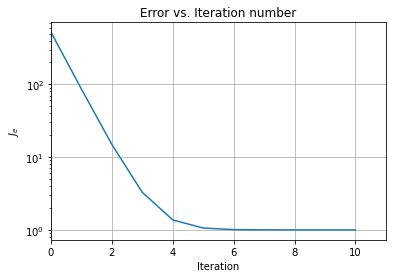

In [5]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
lab5.plotErroVersusIteration(Jgd, iteration)

Após analisar o resultado, responda:

**Justifique todas as respostas.**

A. O algoritmo converge após quantas iterações?<br/>
B. Qual a diferença com o resultado obtido anteriormente, ou seja, quando não padronizamos os atributos? Houve aceleração na convergência?

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**

7. Execute a célula de código abaixo e analise os resultados. Observe que são mostrados os gráficos:
+ da superfície de erro, 
+ do contorno da superfície de erro com o histórico de atualizações dos pesos, além do ponto ótimo, o qual foi encontrado com a equação normal.
+ da variação do gradiente com relação aos pesos $a_1$ e $a_2$ ao longo das iterações.

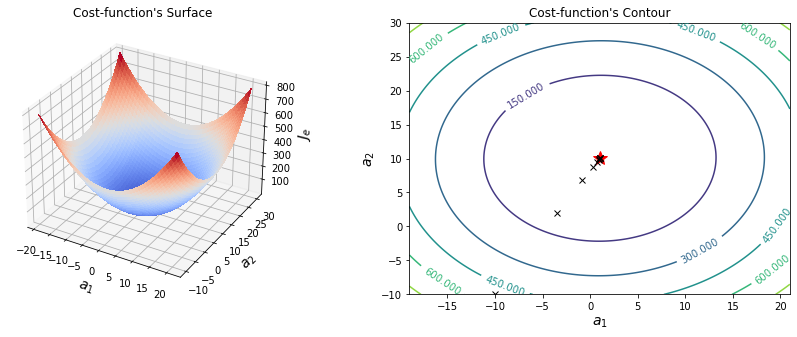

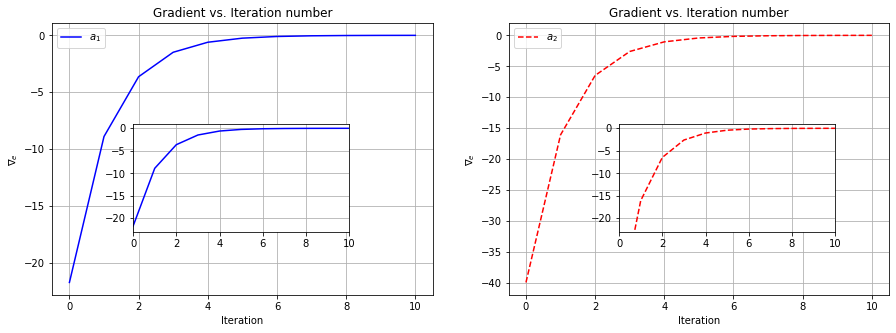

In [6]:
# Closed-form solution.
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(scaled_X, y_noisy, -19.0, 21.0, -10.0, 30.0)

# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt_pad, a_hist, iteration)

# Plot gradient history.
lab5.plotGradientHistory(grad_hist, iteration, x_max=10)

Após analisar os resultados, responda:

**Justifique todas as respostas.**

A. Qual o formato da superfície de erro? Por que ela tem este formato?<br/><br/>
B. Em qual sentido (ou seja, eixo) o erro varia mais rapidamente?<br/><br/>
C. Dado que o algoritmo do gradiente descendente é iniciado com os pesos $a_1=-10$ e $a_2=-10$, qual é o comportamento do histórico de atualização dos pesos? (**DICA**: Analise o gráfico do contorno da superfície de erro com o histórico de atualizações dos pesos.)<br/><br/>
D. Qual dos pesos tem seu valor ótimo encontrando antes, ou isso não ocorre?

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**

#### 2)  Neste exercício, usaremos polinômios de várias ordens como funções hipóteses e verificaremos os efeitos do subajuste e do sobreajuste.

1. Execute a célula de código abaixo e analise o gráfico resultante.

+ No trecho de código abaixo definimos o número de exemplos de treinamento igual a $N=40$ amostras e na sequência, usamos a função `generateDataSet` para gerar $N$ exemplos ruidosos a partir de um modelo gerador **desconhecido**. 
+ Na sequência, plotamos um gráfico comparando o modelo gerador e sua verão ruidosa.

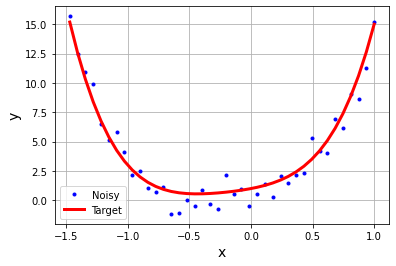

In [4]:
# Import all necessary modules.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import lab5_functions as lab5

# Reset PN sequence generator to a known state.
np.random.seed(42)

# Define the number of examples.
N = 40

# Generate the dataset.
x, y, y_noisy = lab5.generateDataSet(N)

# Plot the comparison between the true model and its noisy version.
plt.plot(x,y_noisy, 'b.', label='Noisy')
plt.plot(x,y, 'r', linewidth=3, label='Target')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

Após analisar o gráfico, responda:

**Justifique todas as respostas.**

A. Seria possível aproximar o modelo gerador com uma função hipótese que fosse a equação de uma reta do tipo $y = a_0 + a_1 x$?

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**

2. Execute a célula de código abaixo e analise os gráficos resultantes.

+ No trecho de código abaixo, comparamos o resultado de aproximações do modelo gerador utilizando funções hipótese polinomais de ordens 1, 2, 4, 20 e 40. 
+ Para isso, criamos um laço de repetição que treina um modelo polinomial com cada uma das ordens definidas a cada nova iteração. 
+ Após o treinamento, realizamos a predição com os valores utilizados durante o treinamento e calculamos o erro quadrático médio entre os valores preditos e os valores esperados.
+ Para criar os modelos, utilizamos 4 classes da biblioteca SciKit-Learn: `PolynomialFeatures`, `StandardScaler`, `LinearRegression` e `Pipeline`, as quais têm suas funções explicadas a seguir:<br/>
    + `PolynomialFeatures`: Cria a matriz de atributos polinomiais de acordo com a ordem passada para o construtor da classe. O objeto desta classe transforma os atributos de entrada, criando combinações polinomiais com grau menor ou igual ao especificado. A classe pode ser configurada para adicionar o atributo de bias ou não através do parâmetro `include_bias`. Para mais informações, leia a documentação da classe: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures).
    + `StandardScaler`: Realiza a padronização dos atributos. O escalonamento de atributos se torna imprescindível quando utilizamos funções hipótese polinomiais pois os termos do polinômio podem fazer com que os valores dos atributos tenham valores muito grandes. Por exemplo, se $x$ varia entre 0 e 10, $x^2$ irá variar entre 0 e 100 e assim por diante. Para mais informações, leia a documentação da classe: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).
    + `LinearRegression`: Realiza a regressão linear com a matriz de atributos polinomial escalonada. Esta implementação utiliza a equação normal para resolver o problema da regressão. Para mais informações, leia a documentação da classe: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).
    + `Pipeline`: Sequencializa a aplicação de transformadores (e.g., `PolynomialFeatures`, `StandardScaler`) aos dados e ao final treina e realiza predições com o objeto da classe `LinearRegression`. Para mais informações, leia a documentação da classe: [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline).

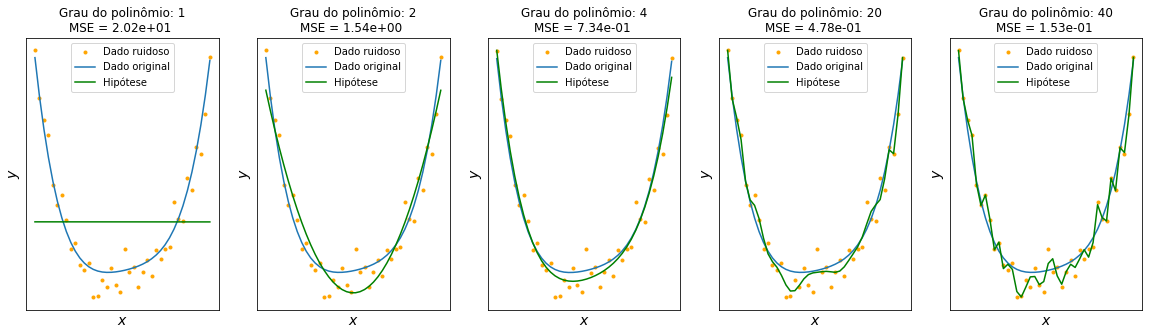

In [6]:
# Polinomial degrees to be tested.
degrees = [1, 2, 4, 20, 40]

# Include column of ones since the target function has a bias term.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    poly_reg.fit(x, y_noisy)
    
    # Use the trained model for prediction.
    y_pred = poly_reg.predict(x)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)
    
    plt.plot(x, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x, y, label='Dado original')
    plt.plot(x, y_pred, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

#Show the plot.
plt.show()

Após analisar os gráficos, responda:

**Justifique todas as respostas.**

A. Dentre estes 5 modelos polinomiais, qual ordem de modelo polinomial melhor aproxima o modelo gerador?<br/>
B. Qual efeito está ocorrendo nos 2 primeiros gráficos, os que mostram aproximações usando modelos polinomiais de ordens 1 e 2?<br/>
C. Qual efeito está ocorrendo nos 2 últimos gráficos, os que mostram aproximações usando modelos polinomiais de ordens 20 e 40?<br/>

**DICA**
+ Para justificar suas respostas, escreva sobre a flexbilidade e grau de generalização dos modelos.

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**

3. Execute a célula de código abaixo e analise o gráfico resultante.

+ No trecho de código abaixo, comparamos os erros de treinamento e validação de aproximações do modelo gerador utilizando funções hipótese polinomais de ordens 1 a 24. 
+ Neste exercício, criamos 2 conjuntos, um de treinamento e outro de validação, com exemplos que não foram utilizados durante o treinamento. 
+ O conjunto de validação, também chamado de conjunto de teste, é usado para se avaliar o grau de generalização dos modelos.
+ No código abaixo, criamos um laço de repetição que treina um modelo polinomial para cada uma das ordens definidas a cada nova iteração. 
+ Após o treinamento, realizamos a predição com os exemplos de treinamento e validação e calculamos o erro quadrático médio entre os valores preditos e os valores esperados. 
+ Ao final, teremos 2 vetores com os valores do erro quadrático médio para cada uma das ordens dos polinômios para os conjuntos de treinamento e validação, respectivamente.

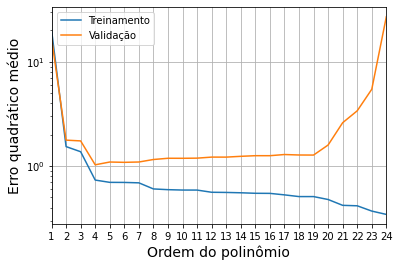

In [40]:
# reset PN sequence generator.
np.random.seed(42)

# Generate the training dataset.
N = 40
x_train, y_train, y_noisy_train = lab5.generateDataSet(N)

# Generate the validation dataset.
N = 100
x_test, y_test, y_noisy_test = lab5.generateDataSet(N)

# Polinomial degrees to be tested.
maxOrder = 25
degrees = range(1,maxOrder)

# Include column of ones since the target function has a bias term.
include_bias = True

mse_train = np.zeros((len(degrees),))
mse_test = np.zeros((len(degrees),))
for i in range(0, len(degrees)):
    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    poly_reg.fit(x_train, y_noisy)
    
    # Use the trained model for prediction.
    y_pred_train = poly_reg.predict(x_train)
    
    # Use the trained model for prediction.
    y_pred_test = poly_reg.predict(x_test)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse_train[i] = mean_squared_error(y_noisy_train, y_pred_train)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse_test[i] = mean_squared_error(y_noisy_test, y_pred_test)

plt.plot(degrees, mse_train, label='Treinamento')
plt.plot(degrees, mse_test, label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático médio', fontsize=14)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlim(1,maxOrder-1)
plt.xticks(range(1,maxOrder,1))
#Show the plot.
plt.show()

De posse das seguintes informações:

+ O efeito do subajuste pode ser verificado quando ambos os erros de treinamento e validação são altos. 
+ O efeito do sobreajuste pode ser verificado quando o erro de treinamento é muito pequeno em relação ao erro de validação que é muito grande.
+ O comportamento ideal do modelo é encontrado quando ambos os erros são pequenos, ou seja, quando uma relação de compromisso entre os dois erros é encontrada.

e após analisar o gráfico, responda:

**Justifique todas as respostas.**

A. Qual ordem do polinômio aproximador apresenta o comportamento ideal?<br/>
B. Quais ordens de polinômio fazem com que o modelo se subajuste aos dados de treinamento?<br/>
C. Quais ordens do polinômio aproximador fazem com que o modelo se sobreajuste aos dados de treinamento?<br/>

<span style="color:blue">Digite aqui as respostas do exercício.</span>

**Resposta**